In [40]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore')

In [5]:
import chardet

# 파일의 인코딩 확인
with open("data/서울교통공사_지하역사 공기질 측정정보_20231231.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result['encoding'])  # 예: 'ISO-8859-1', 'cp949' 등

EUC-KR


In [ ]:
# 데이터 불러오기
import pandas as pd

people_df = pd.read_csv("data/CARD_SUBWAY_MONTH_202312.csv")  # 지하철역별 승하차 인원 데이터 (2023년)
air_df = pd.read_csv("data/서울교통공사_지하역사 공기질 측정정보_20231231.csv", encoding='EUC-KR') # 지하철역별 공기질 데이터 (2023년)

# 승하차 인원 기본 정보 확인
people_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18956 entries, 20231201 to 20231231
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용일자    18956 non-null  object 
 1   노선명     18956 non-null  object 
 2   역명      18956 non-null  int64  
 3   승차총승객수  18956 non-null  int64  
 4   하차총승객수  18956 non-null  int64  
 5   등록일자    0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ MB


In [32]:
people_df.drop('등록일자', axis=1, inplace=True)

In [33]:
people_df.rename(columns={
    '사용일자': '노선명',
    '노선명': '역명',
    '역명' : '승차총승객수',
    '승차총승객수' : '하차총승객수',
    '하차총승객수' : '등록일자'
}, inplace=True)

In [34]:
people_df.head(10)

,노선명,역명,승차총승객수,하차총승객수,등록일자
20231201,2호선,대림(구로구청),25995,26770,20231204
20231201,2호선,신도림,55447,55057,20231204
20231201,2호선,문래,25818,26561,20231204
20231201,2호선,영등포구청,24517,25006,20231204
20231201,2호선,당산,20266,23832,20231204
20231201,2호선,합정,36748,41409,20231204
20231201,2호선,홍대입구,74538,84106,20231204
20231201,2호선,신촌,44520,46034,20231204
20231201,2호선,이대,19184,20048,20231204
20231201,2호선,아현,12304,11542,20231204


In [55]:
filtered_df = people_df[people_df['등록일자'] == 20231231]

line1_people_df = filtered_df[filtered_df['노선명']=='1호선']
line1_people_df

,노선명,역명,승차총승객수,하차총승객수,등록일자
20231228,1호선,동묘앞,8893,9172,20231231
20231228,1호선,청량리(서울시립대입구),23201,22373,20231231
20231228,1호선,제기동,18641,19107,20231231
20231228,1호선,신설동,14917,14430,20231231
20231228,1호선,동대문,12362,11861,20231231
20231228,1호선,종로5가,27715,27480,20231231
20231228,1호선,종로3가,29592,27239,20231231
20231228,1호선,종각,44597,43558,20231231
20231228,1호선,시청,29962,29556,20231231
20231228,1호선,서울역,56709,56349,20231231


In [56]:
line1_people_df['역명'].unique()

array(['동묘앞', '청량리(서울시립대입구)', '제기동', '신설동', '동대문', '종로5가', '종로3가', '종각',
       '시청', '서울역'], dtype=object)

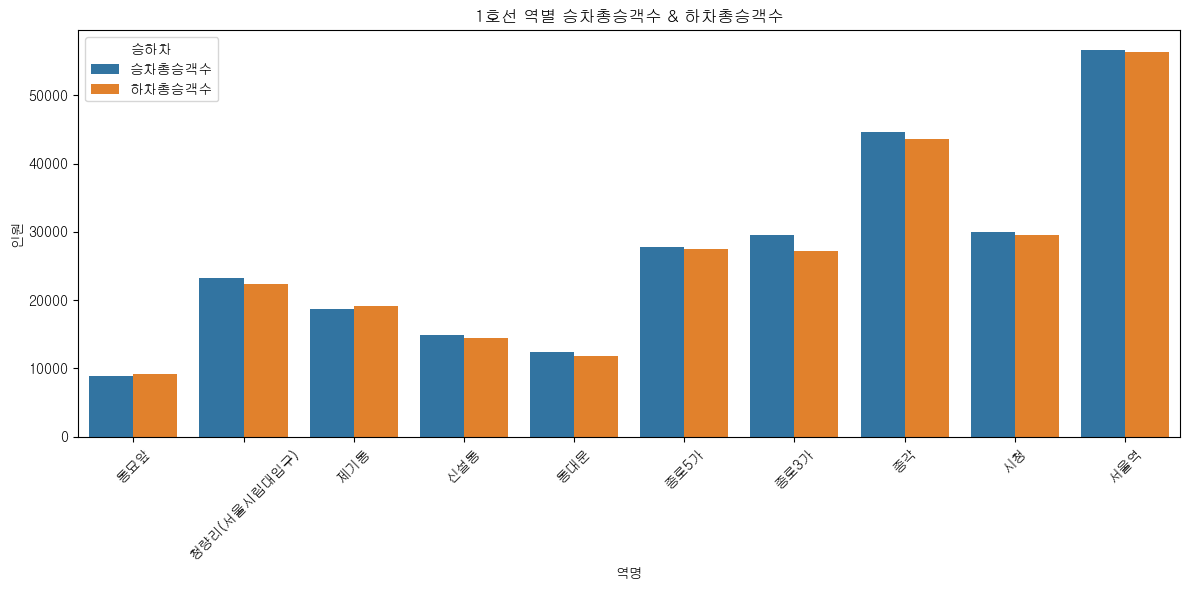

In [52]:
# 시각화
line1_people_df = filtered_df[filtered_df['노선명']=='1호선']

# long format으로 변환
melted_df = line1_people_df.melt(id_vars='역명', value_vars=['승차총승객수', '하차총승객수'],
                          var_name='인원', value_name='수')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='역명', y='수', hue='인원')

plt.title('1호선 역별 승차총승객수 & 하차총승객수')
plt.xlabel('역명')
plt.ylabel('인원')
plt.xticks(rotation=45)
plt.legend(title='승하차')
plt.tight_layout()
plt.show()

In [ ]:
# 공기질 데이터 기본 정보 확인
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연번        263 non-null    int64  
 1   호선        263 non-null    object 
 2   역명        263 non-null    object 
 3   미세먼지      263 non-null    float64
 4   초미세먼지     263 non-null    float64
 5   이산화탄소     263 non-null    float64
 6   폼알데하이드    263 non-null    float64
 7   일산화탄소     263 non-null    float64
 8   이산화질소     263 non-null    float64
 9   라돈        263 non-null    float64
 10  휘발성유기화합물  263 non-null    float64
 11  데이터기준일자   263 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 24.8+ KB


In [19]:
air_df.head(10)

,연번,호선,역명,미세먼지,초미세먼지,이산화탄소,폼알데하이드,일산화탄소,이산화질소,라돈,휘발성유기화합물,데이터기준일자
0,1,1호선,서울역(1),33.7,68.8,525.0,15.8,1.7,0.016,10.1,123.0,2023-12-31
1,2,1호선,시청(1),54.7,81.7,444.0,6.0,1.4,0.017,13.4,71.6,2023-12-31
2,3,1호선,종각,49.8,162.1,605.5,7.0,0.9,0.018,15.8,111.9,2023-12-31
3,4,1호선,종로3가(1),64.7,75.9,575.5,7.0,0.5,0.016,8.7,150.7,2023-12-31
4,5,1호선,종로5가,71.4,106.5,554.0,8.4,0.8,0.017,11.6,105.2,2023-12-31
5,6,1호선,동대문(1),61.1,76.9,756.0,9.3,0.6,0.015,16.2,142.4,2023-12-31
6,7,1호선,동묘앞(1),46.5,49.5,457.0,7.8,0.7,0.016,10.1,147.7,2023-12-31
7,8,1호선,신설동(1),72.3,70.8,563.0,8.4,0.4,0.016,13.9,90.5,2023-12-31
8,9,1호선,제기동,63.0,76.5,509.0,9.3,0.5,0.015,10.2,100.1,2023-12-31
9,10,1호선,청량리,56.0,38.6,509.0,6.3,0.7,0.018,7.9,89.6,2023-12-31


In [39]:
air_df[air_df['호선']=='1호선']

,연번,호선,역명,미세먼지,초미세먼지,이산화탄소,폼알데하이드,일산화탄소,이산화질소,라돈,휘발성유기화합물,데이터기준일자
0,1,1호선,서울역(1),33.7,68.8,525.0,15.8,1.7,0.016,10.1,123.0,2023-12-31
1,2,1호선,시청(1),54.7,81.7,444.0,6.0,1.4,0.017,13.4,71.6,2023-12-31
2,3,1호선,종각,49.8,162.1,605.5,7.0,0.9,0.018,15.8,111.9,2023-12-31
3,4,1호선,종로3가(1),64.7,75.9,575.5,7.0,0.5,0.016,8.7,150.7,2023-12-31
4,5,1호선,종로5가,71.4,106.5,554.0,8.4,0.8,0.017,11.6,105.2,2023-12-31
5,6,1호선,동대문(1),61.1,76.9,756.0,9.3,0.6,0.015,16.2,142.4,2023-12-31
6,7,1호선,동묘앞(1),46.5,49.5,457.0,7.8,0.7,0.016,10.1,147.7,2023-12-31
7,8,1호선,신설동(1),72.3,70.8,563.0,8.4,0.4,0.016,13.9,90.5,2023-12-31
8,9,1호선,제기동,63.0,76.5,509.0,9.3,0.5,0.015,10.2,100.1,2023-12-31
9,10,1호선,청량리,56.0,38.6,509.0,6.3,0.7,0.018,7.9,89.6,2023-12-31


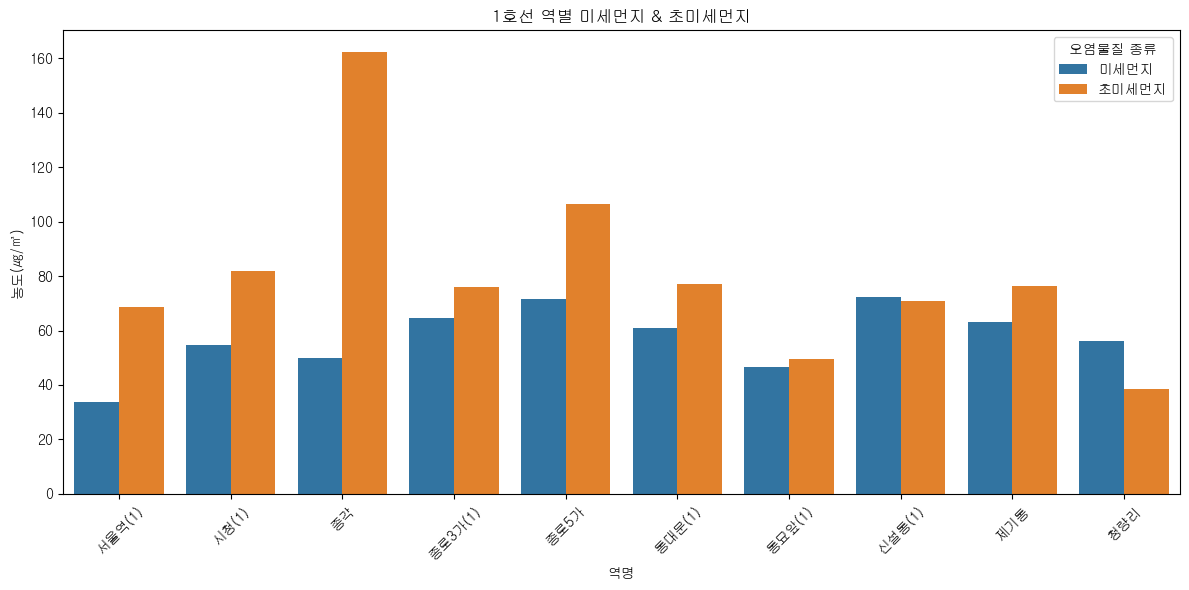

In [57]:
# 시각화
line1_air_df = air_df[air_df['호선'] == '1호선']

# long format으로 변환
melted_df = line1_air_df.melt(id_vars='역명', value_vars=['미세먼지', '초미세먼지'],
                          var_name='종류', value_name='농도')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='역명', y='농도', hue='종류')

plt.title('1호선 역별 미세먼지 & 초미세먼지')
plt.xlabel('역명')
plt.ylabel('농도(㎍/㎥)')
plt.xticks(rotation=45)
plt.legend(title='오염물질 종류')
plt.tight_layout()
plt.show()

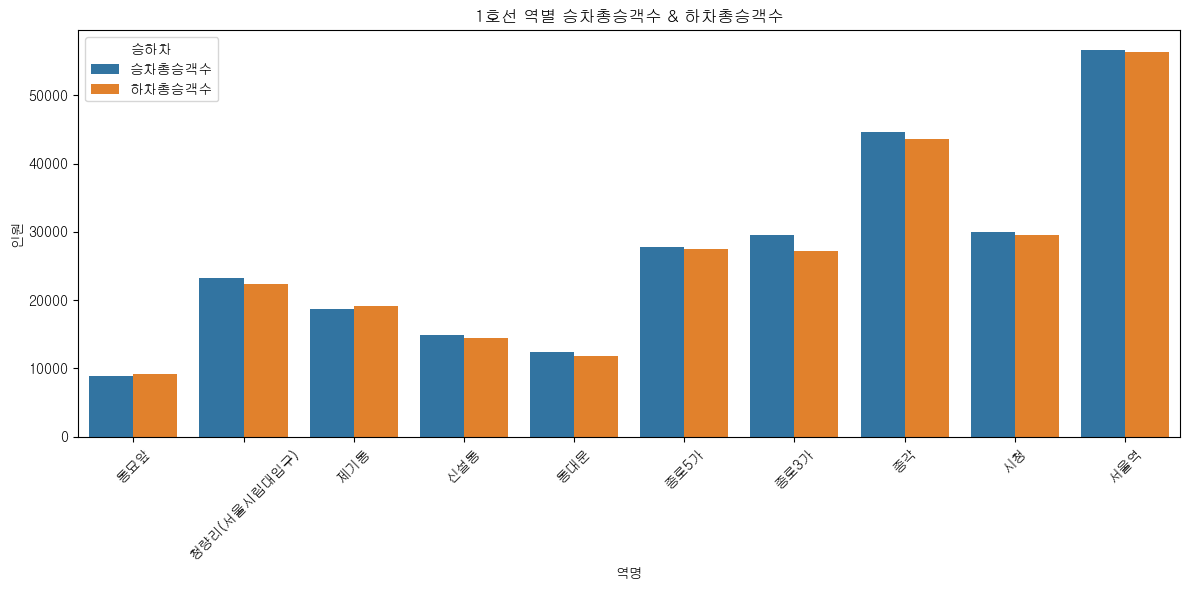

In [58]:
# 시각화
line1_people_df = filtered_df[filtered_df['노선명']=='1호선']

# long format으로 변환
melted_df = line1_people_df.melt(id_vars='역명', value_vars=['승차총승객수', '하차총승객수'],
                          var_name='인원', value_name='수')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='역명', y='수', hue='인원')

plt.title('1호선 역별 승차총승객수 & 하차총승객수')
plt.xlabel('역명')
plt.ylabel('인원')
plt.xticks(rotation=45)
plt.legend(title='승하차')
plt.tight_layout()
plt.show()

In [60]:
line1_people_df['역명'].unique()

array(['동묘앞', '청량리(서울시립대입구)', '제기동', '신설동', '동대문', '종로5가', '종로3가', '종각',
       '시청', '서울역'], dtype=object)

In [59]:
line1_air_df['역명'].unique()

array(['서울역(1)', '시청(1)', '종각', '종로3가(1)', '종로5가', '동대문(1)', '동묘앞(1)',
       '신설동(1)', '제기동', '청량리'], dtype=object)